### Step 1: Load some libraries for data exploration
Python has several libraries that are good for analysing large amounts of data.  Let's begin by installing these onto your machine (if you don't have them installed already) and loading them.

For this data analysis we are going to use:
- Numpy:  This is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.
- Pandas: Adds a dataframe object to Python!
- Seaborn: Makes pretty graphs
- Matplotlib: Can't have a graph without matplotlib!

To install a package in Python you can just run the commands below.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Step 2: Load New York
Now we will load all the data for one city.  Let's start with New York.  I will assume you have downloaded and unzipped the data as Joseph has shown you!

This code assumes that your notebook file is in a file which has subfolders in it for the data in each city.

In [47]:
nylist = pd.read_csv('New York/listings.csv')
nycal= pd.read_csv('New York/calendar.csv')

In [48]:
nylist.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [49]:
nylist.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2515,Stay at Chez Chic budget room #1,2758,Mizi,Manhattan,Harlem,40.80,-73.95,Private room,59,2,156,2017-07-31,1.44,3,295
1,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.65,-73.97,Private room,75,1,7,2017-08-15,0.33,7,365
2,2595,Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,21,2017-07-22,0.22,2,346
3,3330,++ Brooklyn Penthouse Guestroom ++,4177,Julia,Brooklyn,Williamsburg,40.71,-73.94,Private room,125,3,24,2016-09-30,0.26,3,339
4,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.81,-73.94,Private room,150,3,0,NaN,nan,1,365


In [50]:
nycal.dtypes

listing_id     int64
date          object
available     object
price         object
dtype: object

In [51]:
nycal.head()

,listing_id,date,available,price
0,2515,2018-09-01,t,$89.00
1,2515,2018-05-08,t,$89.00
2,2515,2018-05-07,t,$89.00
3,2515,2018-05-06,t,$89.00
4,2515,2018-05-05,t,$89.00


### Step 3: Check data summaries for the fields you are interested in
For this tutorial, we are going to look for people using Air BNB as a hotel service in New York.

In [52]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) # disable scientific notation
nylist.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,41157.00,41157.00,41157.00,41157.00,41157.00,41157.00,41157.00,32879.00,41157.00,41157.00
mean,10774531.85,33714905.22,40.73,-73.96,147.37,4.08,18.62,1.41,1.63,126.69
std,6130861.35,37140193.80,0.05,0.04,206.28,13.05,33.10,1.95,2.00,138.64
min,2515.00,72.00,40.50,-74.24,0.00,1.00,0.00,0.01,1.00,0.00
25%,5506020.00,5037211.00,40.69,-73.98,70.00,1.00,1.00,0.25,1.00,0.00
50%,11098587.00,19349568.00,40.72,-73.96,105.00,2.00,5.00,0.81,1.00,64.00
75%,16218094.00,49286334.00,40.76,-73.94,175.00,4.00,21.00,2.05,2.00,276.00
max,20197207.00,143817547.00,40.91,-73.71,10000.00,1250.00,477.00,196.00,35.00,365.00


In [53]:
nylist.loc[nylist["calculated_host_listings_count"] == 35]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
9912,5188840,Home 4 Medical Professionals-St John's Episcop...,26377263,Stat,Queens,Far Rockaway,40.60,-73.76,Private room,38,30,4,2017-03-29,0.17,35,290
10140,5382755,Home 4 Medical Professionals-Kngbr6,26377263,Stat,Brooklyn,East Flatbush,40.66,-73.94,Private room,44,30,1,2016-09-30,0.09,35,262
10143,5384774,Home 4 Medical Professionals-St Johns Episcopal 1,26377263,Stat,Queens,Far Rockaway,40.60,-73.76,Private room,38,30,2,2015-07-31,0.07,35,212
10277,5494750,Home 4 Medical Professionals-Kngbr4,26377263,Stat,Brooklyn,East Flatbush,40.66,-73.94,Private room,38,30,0,NaN,nan,35,250
10278,5495026,Home 4 Medical Professionals-Kngbr5,26377263,Stat,Brooklyn,East Flatbush,40.66,-73.93,Private room,48,30,2,2016-05-07,0.07,35,269
10336,5538353,Home 4 Medical Professionals-KingsC,26377263,Stat,Brooklyn,Prospect-Lefferts Gardens,40.66,-73.94,Private room,45,30,0,NaN,nan,35,352
10337,5538410,Home 4 Medical Professionals-Dwnst8,26377263,Stat,Brooklyn,East Flatbush,40.66,-73.95,Private room,45,30,0,NaN,nan,35,352
10397,5581272,Home 4 Medical Professionals- St Johns Episcop...,26377263,Stat,Queens,Far Rockaway,40.60,-73.75,Private room,38,30,3,2017-08-05,0.11,35,304
10399,5581442,Home 4 Medical Professionals- St Johns Episcop...,26377263,Stat,Queens,Far Rockaway,40.60,-73.75,Private room,38,30,5,2017-05-13,0.19,35,275
10457,5632551,Home 4 Medical Professionals-Wyckoff Heights MC 6,26377263,Stat,Brooklyn,Bushwick,40.70,-73.92,Private room,48,30,2,2015-09-26,0.08,35,65


In [54]:
nylist.loc[(nylist["calculated_host_listings_count"] != 1) & (nylist["room_type"] == "Entire home/apt")]

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2,2595,Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75,-73.98,Entire home/apt,225,1,21,2017-07-22,0.22,2,346
13,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71,-73.99,Entire home/apt,140,1,141,2017-04-20,1.45,4,263
21,7097,Perfect for Your Parents + Garden,17571,J.,Brooklyn,Fort Greene,40.69,-73.97,Entire home/apt,215,2,131,2017-08-27,1.41,2,321
30,8343,"3BR, 1.5 BA East Village apt w/yard",24222,Lori,Manhattan,East Village,40.72,-73.98,Entire home/apt,350,4,10,2016-01-02,0.14,2,248
33,8490,"MAISON DES SIRENES1,bohemian apartment",25183,Nathalie,Brooklyn,Bedford-Stuyvesant,40.68,-73.94,Entire home/apt,120,2,46,2017-08-24,0.47,2,313
43,11708,Cute apt in artist's home,44145,Tyrome,Brooklyn,Bushwick,40.70,-73.93,Entire home/apt,85,2,146,2017-08-07,1.69,2,27
73,14699,NYC's Brooklyn's Treehouse Retreat,55469,Chanoch,Brooklyn,Flatbush,40.64,-73.96,Entire home/apt,350,7,3,2016-09-23,0.04,4,365
77,15239,Central Park Bliss,16179,Marys,Manhattan,Upper West Side,40.78,-73.98,Entire home/apt,325,2,8,2017-07-29,0.59,2,325
81,15711,2 bedroom - Upper East Side-next to pool/park,61491,D,Manhattan,Upper East Side,40.77,-73.95,Entire home/apt,285,2,47,2017-08-14,0.50,2,284
87,16326,Comfortable 4-bedroom apt in family house.,63588,Dimitri,Brooklyn,Prospect Heights,40.68,-73.96,Entire home/apt,345,5,114,2017-08-20,1.34,3,274


### Step 4: Check distributions
When checking distributions - you should consider the range of the variable.  You need to consider which variables are continuous and which are discrete.  Continuous variables are usually counts of things.  Discrete variables are categories, or types.  In our listings table, can you name a few of each variable type?

For continuous variables - we are looking for a histogram, but for discrete values you want to look at the count of each unique value.

Let's do an example of both.

In [55]:
nylist['room_type'].unique()

array(['Private room', 'Entire home/apt', 'Shared room'], dtype=object)

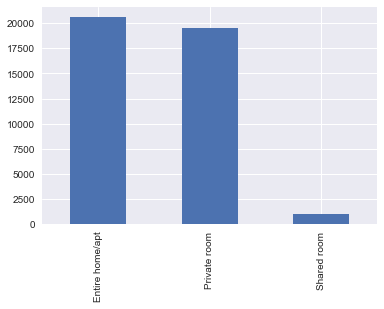

In [56]:
nylist['room_type'].value_counts().plot( kind='bar')

(array([ 18435.,   2815.,   2638.,   1623.,   1777.,    760.,   1728.,
          2141.,   3348.,   5892.]),
 array([   0. ,   36.5,   73. ,  109.5,  146. ,  182.5,  219. ,  255.5,
         292. ,  328.5,  365. ]),
 <a list of 10 Patch objects>)

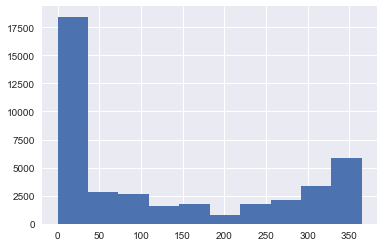

In [57]:
plt.hist(nylist['availability_365'])